In [1]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import HistGradientBoostingRegressor
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import MultipleLocator
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
import Common_Functions as cmn

# Combine All Regressions into one Graph

In [2]:
sns.set_context("paper")
sns.set_style("ticks")

In [3]:
observed_price = cmn.get_stringless_training_data()
prices = observed_price.iloc[:,-1:]
rf = pd.read_csv("Exported_Data/RandomForestPrediction.csv")
prices["Random Forest Prediction"] = rf.iloc[:,-1:]

gbr = pd.read_csv("Exported_Data/GBR.csv")
prices["Gradient Boosted Regressor Prediction"] = gbr.iloc[:,-1:]

ols = pd.read_csv("Exported_Data/OLS.csv")
prices["OLS Prediction"] = ols.iloc[:,-1:]
#prices["XBG Regressor Prediction"] = pd.read_csv("")
prices.head(10)

,SalePrice,Random Forest Prediction,Gradient Boosted Regressor Prediction,OLS Prediction
0,208500,195010.8768,196920.235988,227243.598710
1,181500,166497.6411,169002.591612,196355.868944
2,223500,217094.9719,205675.693046,222831.166926
3,140000,175352.3558,175032.159077,199358.318716
4,250000,282948.0721,285592.959973,295552.240770
5,143000,154261.1115,170642.838468,178645.733189
6,307000,303685.3705,269135.471938,272538.422890
7,200000,237795.4477,240597.739676,251870.815786
8,129900,197720.2302,152521.767386,189753.427301
9,118000,119412.9587,125585.384201,83918.353787


<AxesSubplot:title={'center':'All Regression Pricing Predictions Compared to the Original Dataset'}, xlabel='Sample Number', ylabel='House Price'>

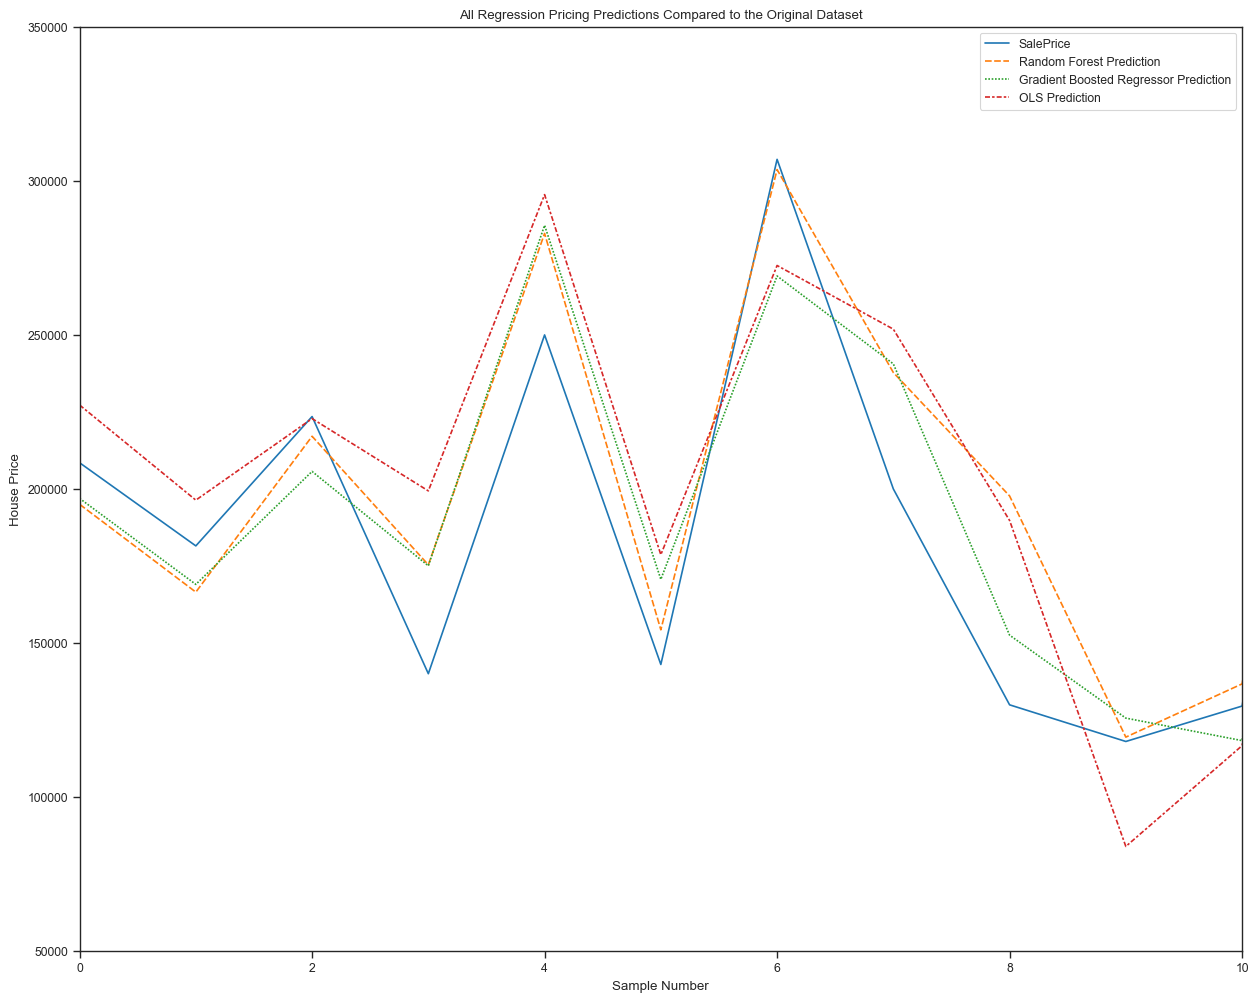

In [6]:
fig, ax = plt.subplots(figsize=(15, 12))
#ax = sns.lineplot(prices)

#sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

#create a legend
plt.xlim(0, 10)
plt.ylim(50000, 350000)
#plt.tight_layout()
plt.title("All Regression Pricing Predictions Compared to the Original Dataset")
# always label your axes
plt.xlabel(r"Sample Number")
plt.ylabel(r"House Price")
sns.lineplot(data=prices)

Text(0, 0.5, 'House Price')

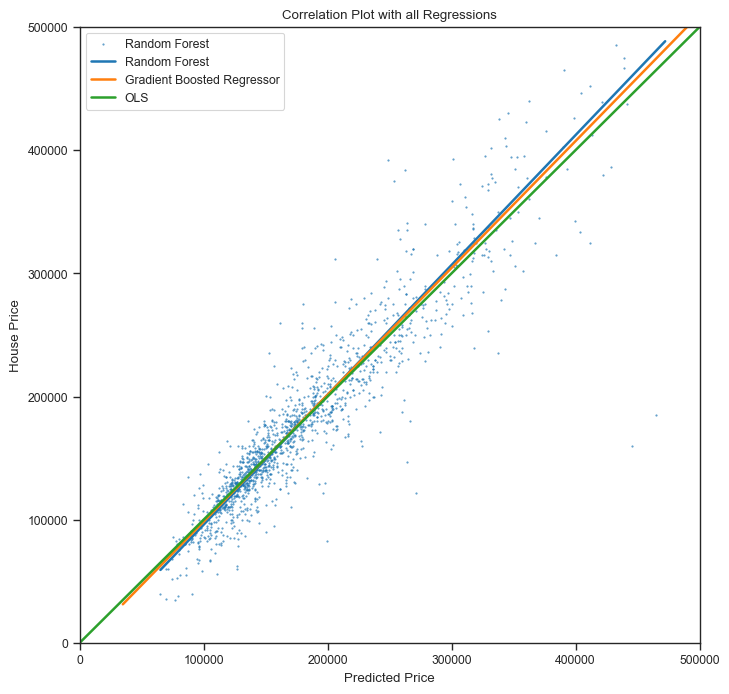

In [5]:
fig, ax = plt.subplots(figsize=(8, 8))
#ax = sns.lineplot(prices)

#sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

#create a legend
plt.xlim(0, 500000)
plt.ylim(0, 500000)
#plt.tight_layout()
plt.title("Correlation Plot with all Regressions")
# always label your axes

sns.regplot(data=prices, x=prices.iloc[:,1:2], y="SalePrice", label="RF", ci=None, scatter_kws={'s':1}, marker=".")
sns.regplot(data=prices, x=prices.iloc[:,2:3], y="SalePrice", scatter=False, label="Gradient Boosted Regressor", ci=None)
sns.regplot(data=prices, x=prices.iloc[:,3:4], y="SalePrice", scatter=False, label="OLS", ci=None)
#sns.regplot(data=prices, x=prices.iloc[:,3:4], y="SalePrice", scatter=False, label="XGB", ci=None)
plt.legend(labels=["Random Forest","Random Forest", "Gradient Boosted Regressor", "OLS", "XGB"])
plt.xlabel(r"Predicted Price")
plt.ylabel(r"House Price")

# Weightings based on Perceived Accuracy

In [10]:
observed_price = cmn.get_stringless_training_data()
prices = observed_price.iloc[:,-1:]
rf = pd.read_csv("Exported_Data/RandomForestPrediction.csv")
prices["Random Forest Prediction"] = rf.iloc[:,-1:]

gbr = pd.read_csv("Exported_Data/GBR.csv")
prices["Gradient Boosted Regressor Prediction"] = gbr.iloc[:,-1:]

ols = pd.read_csv("Exported_Data/OLS.csv")
prices["OLS Prediction"] = ols.iloc[:,-1:]
#prices["XBG Regressor Prediction"] = pd.read_csv("")

In [15]:
weight = [.3, .4, .4]
columns = ["Random Forest Prediction", "Gradient Boosted Regressor Prediction", "OLS Prediction"]
prices["Weighted Average"] = np.average(prices[columns], weights=weight, axis=1)

prices.head(10)

,SalePrice,Random Forest Prediction,Gradient Boosted Regressor Prediction,OLS Prediction,Weighted Average
0,208500,195010.8768,196920.235988,227243.598710,207426.179018
1,181500,166497.6411,169002.591612,196355.868944,178266.069593
2,223500,217094.9719,205675.693046,222831.166926,215028.395962
3,140000,175352.3558,175032.159077,199358.318716,183965.361689
4,250000,282948.0721,285592.959973,295552.240770,288493.183570
5,143000,154261.1115,170642.838468,178645.733189,169085.238284
6,307000,303685.3705,269135.471938,272538.422890,279795.608256
7,200000,237795.4477,240597.739676,251870.815786,243932.778631
8,129900,197720.2302,152521.767386,189753.427301,178387.406304
9,118000,119412.9587,125585.384201,83918.353787,108750.348005


<AxesSubplot:title={'center':'All Regression Pricing Predictions Compared to the Original Dataset'}, xlabel='Sample Number', ylabel='House Price'>

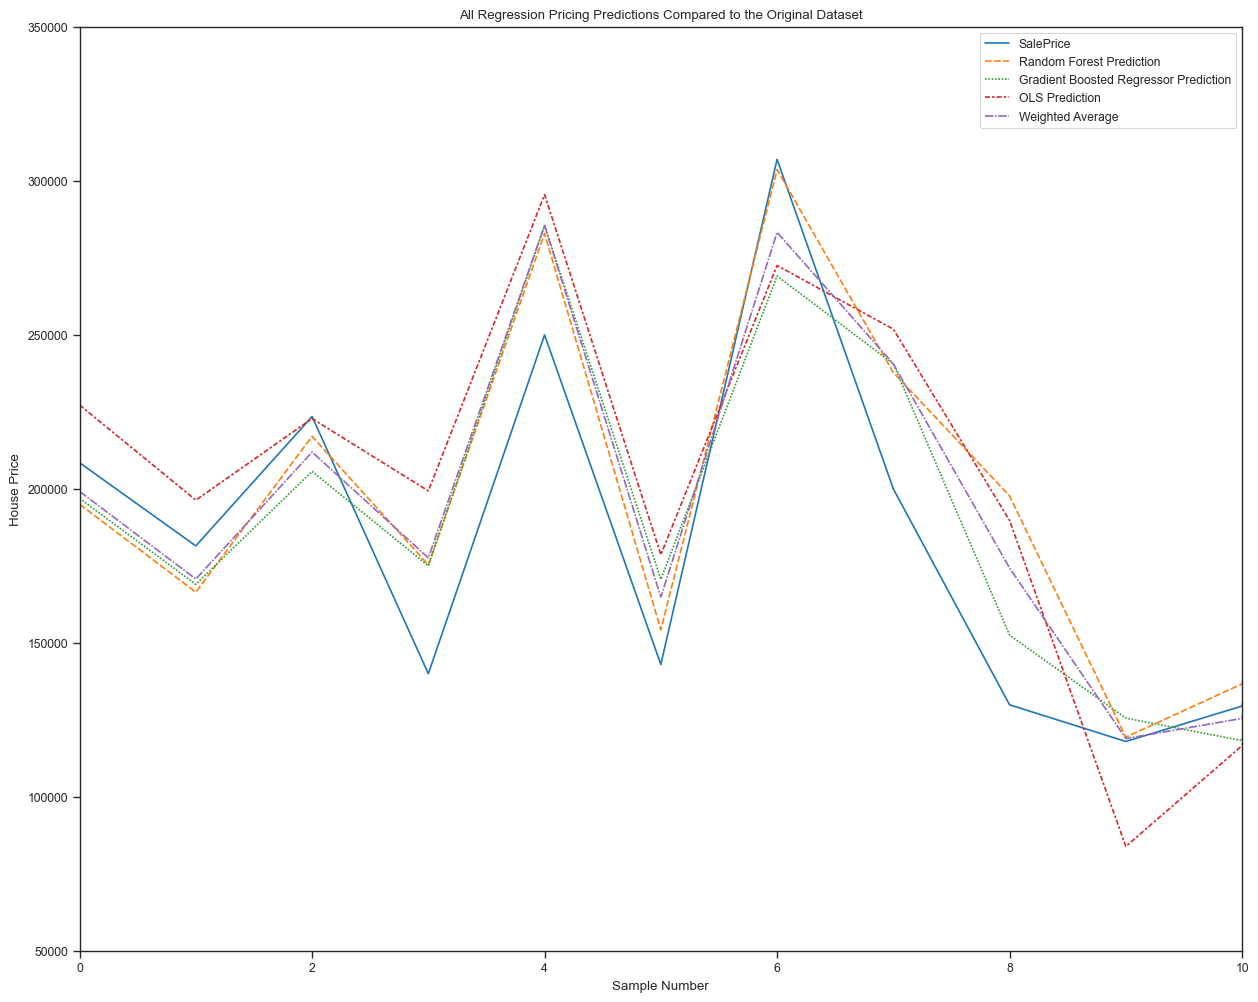

In [12]:
fig, ax = plt.subplots(figsize=(15, 12))
#ax = sns.lineplot(prices)

#sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

#create a legend
plt.xlim(0, 10)
plt.ylim(50000, 350000)
#plt.tight_layout()
plt.title("All Regression Pricing Predictions Compared to the Original Dataset")
# always label your axes
plt.xlabel(r"Sample Number")
plt.ylabel(r"House Price")
sns.lineplot(data=prices)